<a href="https://colab.research.google.com/github/Abid-Ansari/Handwritten-Digit-recognition-using-Digital-image-processing-techniques/blob/main/HandWrittenDigit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten images into vectors
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Compute mean image
mean_image = np.mean(X_train, axis=0)

# Subtract mean image from training and testing sets
X_train_centered = X_train - mean_image
X_test_centered = X_test - mean_image

# Compute eigenvectors using PCA on training set
covariance = np.cov(X_train_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Sort eigenvectors in descending order of eigenvalues
sorted_indices = eigenvalues.argsort()[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Extract eigenfaces
eigenfaces = sorted_eigenvectors[:, :100].reshape(-1, 28, 28)

# Compute coefficients for training and testing sets
X_train_coeffs = np.dot(X_train_centered, sorted_eigenvectors[:, :100])
X_test_coeffs = np.dot(X_test_centered, sorted_eigenvectors[:, :100])

# Classify test images based on minimum euclidean distance to training images
y_pred = np.zeros_like(y_test)
for i in range(len(X_test_coeffs)):
    distances = np.linalg.norm(X_train_coeffs - X_test_coeffs[i], axis=1)
    min_index = np.argmin(distances)
    y_pred[i] = y_train[min_index]

# Calculate classification accuracy
accuracy = np.mean(y_pred == y_test)
print('Classification accuracy: {:.2f}%'.format(accuracy * 100))


11490434/11490434 [==============================] - 0s 0us/step
Classification accuracy: 97.16%


In [ ]:
from matplotlib import pyplot as plt

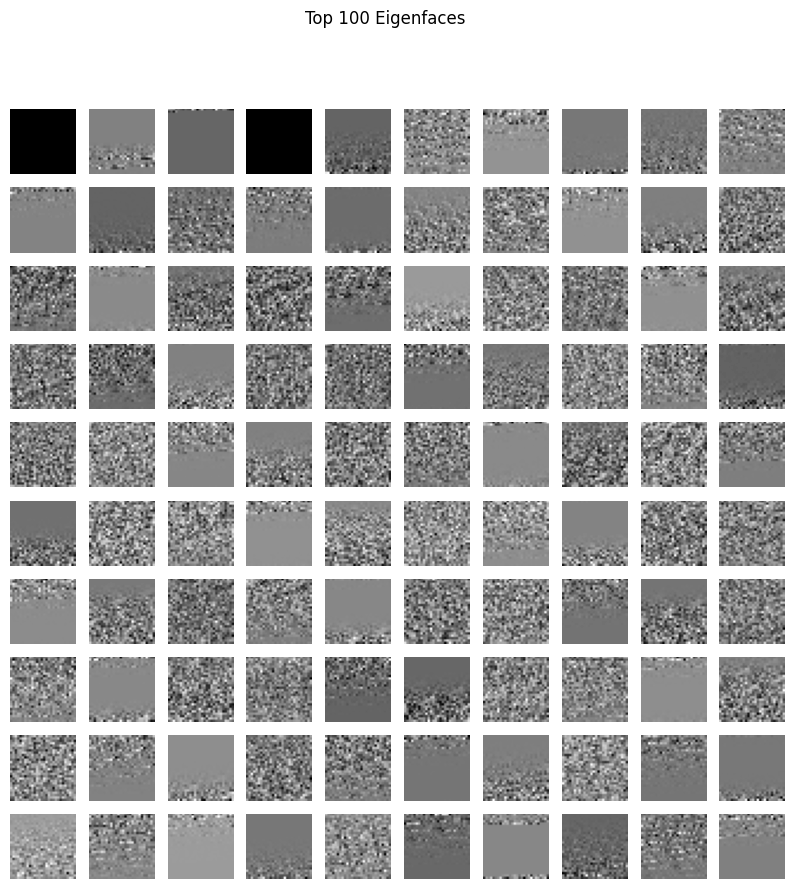

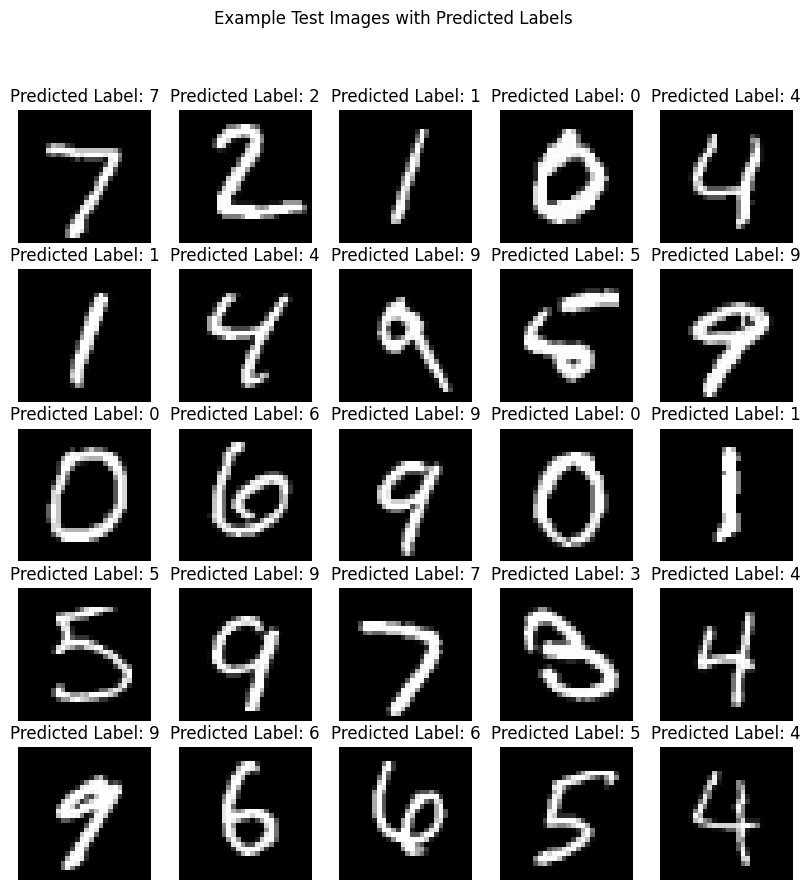

In [ ]:
# Visualize eigenfaces
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(eigenfaces[i * 10 + j], cmap='gray')
        axs[i, j].axis('off')
plt.suptitle('Top 100 Eigenfaces')
plt.show()

# Visualize example test images with predicted labels
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        index = i * 5 + j
        axs[i, j].imshow(X_test[index].reshape(28, 28), cmap='gray')
        axs[i, j].set_title('Predicted Label: {}'.format(y_pred[index]))
        axs[i, j].axis('off')
plt.suptitle('Example Test Images with Predicted Labels')
plt.show()